# Prueba de datos

🔍 Buscando datos desde: c:\Users\Equipo\Desktop\Machine_DL...
✅ ¡ENCONTRADO!
📄 Archivo CSV: ..\petfinder-adoption-prediction\train\train.csv
📂 Carpeta base de datos: ..\petfinder-adoption-prediction

MASCOTA: Su Yin (ID: 057e5347f)
Raza:    Mixed Breed
Target:  4


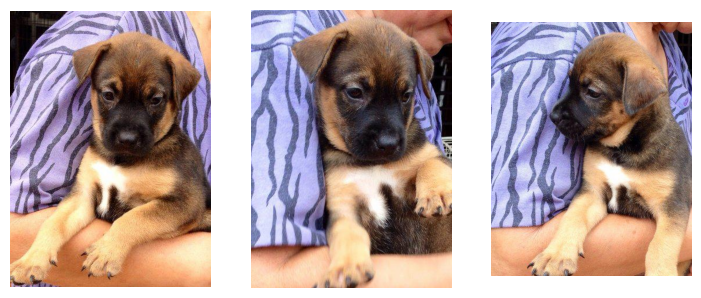

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

current_dir = os.getcwd()
search_start = ".." # Sube un nivel


print(f"🔍 Buscando datos desde: {os.path.abspath(search_start)}...")

train_path = None
root_data_folder = None

# Recorremos buscando 'train.csv'
for root, dirs, files in os.walk(search_start):
    if "train.csv" in files:
        train_path = os.path.join(root, "train.csv")
        if os.path.basename(root) == 'train':
            root_data_folder = os.path.dirname(root)
        else:
            root_data_folder = root
        
        print(f"✅ ¡ENCONTRADO!")
        print(f"📄 Archivo CSV: {train_path}")
        print(f"📂 Carpeta base de datos: {root_data_folder}")
        break

if not train_path:
    raise FileNotFoundError("❌ No se pudo localizar 'train.csv'. Asegúrate de que la carpeta 'petfinder-adoption-prediction' esté en Machine_DL.")


BREED_CSV_PATH = os.path.join(root_data_folder, 'breed_labels.csv')
COLOR_CSV_PATH = os.path.join(root_data_folder, 'color_labels.csv')
TRAIN_IMG_DIR  = os.path.join(root_data_folder, 'train_images') #


train = pd.read_csv(train_path)
breeds = pd.read_csv(BREED_CSV_PATH)
colors = pd.read_csv(COLOR_CSV_PATH)

# --- FUNCIONES DE APOYO ---
breed_dict = dict(zip(breeds['BreedID'], breeds['BreedName']))
def get_breed_name(breed_id):
    return breed_dict.get(breed_id, "Desconocido")

def visualizar_mascota(pet_id=None):
    if pet_id is None:
        pet_id = train.sample(1)['PetID'].values[0]
    
    pet_data = train[train['PetID'] == pet_id].iloc[0]
    
    print(f"\n{'='*40}")
    print(f"MASCOTA: {pet_data['Name']} (ID: {pet_id})")
    print(f"Raza:    {get_breed_name(pet_data['Breed1'])}")
    print(f"Target:  {pet_data['AdoptionSpeed']}")
    
    # Buscar imágenes en la carpeta detectada
    if os.path.exists(TRAIN_IMG_DIR):
        images = [f for f in os.listdir(TRAIN_IMG_DIR) if str(pet_id) in f and f.endswith('.jpg')]
        images.sort()
        
        if images:
            plt.figure(figsize=(15, 5))
            for i, img_file in enumerate(images[:5]):
                img_path = os.path.join(TRAIN_IMG_DIR, img_file)
                img = mpimg.imread(img_path)
                plt.subplot(1, 5, i + 1)
                plt.imshow(img)
                plt.axis('off')
            plt.show()
        else:
            print(">> No hay fotos para esta mascota.")
    else:
        print(f">> Carpeta de imágenes no encontrada en: {TRAIN_IMG_DIR}")

# ---EJECUTAR ---
visualizar_mascota()

# Estructura de datos y creación de un DataFrame

In [ ]:
# import shutil

# # Definir rutas de destino
# base_tratados = 'datos tratados'
# train_dest = os.path.join(base_tratados, 'Train')
# test_dest = os.path.join(base_tratados, 'Test') # Usaremos Test como el set de validación

# # Crear estructura de carpetas (Train/0, Train/1... Test/0, Test/1...)
# # Creamos subcarpetas para cada clase (0 a 4) para que la CNN sepa la etiqueta automáticamente
# clases = ['0', '1', '2', '3', '4']

# for carpeta in [train_dest, test_dest]:
#     for clase in clases:
#         os.makedirs(os.path.join(carpeta, clase), exist_ok=True)

# print(f"📁 Estructura de carpetas creada en '{base_tratados}'")

# # 3. Función para copiar archivos a sus nuevas carpetas
# def copiar_imagenes(df, destino_base):
#     count = 0
#     for _, row in df.iterrows():
#         # Ruta de origen (ya la tenemos en el df de la Fase 1)
#         origen = row['Path']
        
#         # Nombre del archivo original
#         nombre_archivo = os.path.basename(origen)
        
#         # Ruta de destino: datos tratados / [Train o Test] / [Clase] / [NombreArchivo]
#         destino = os.path.join(destino_base, row['AdoptionSpeed'], nombre_archivo)
        
#         # Copiar el archivo (shutil.copy2 mantiene metadatos)
#         if os.path.exists(origen):
#             shutil.copy2(origen, destino)
#             count += 1
#     return count

# # 4. Ejecutar la copia (Esto puede tardar un poco dependiendo de tu disco)
# print("🚀 Copiando imágenes a Train...")
# num_train = copiar_imagenes(train_df, train_dest)
# print(f"✅ {num_train} imágenes copiadas a Train.")

# print("🚀 Copiando imágenes a Test...")
# num_test = copiar_imagenes(val_df, test_dest)
# print(f"✅ {num_test} imágenes copiadas a Test.")

# print("\n✨ ¡Proceso finalizado! Los datos están listos.")

📁 Estructura de carpetas creada en 'datos tratados'


✅ Analizando datos en: c:\Users\Equipo\Desktop\Machine_DL\datos tratados


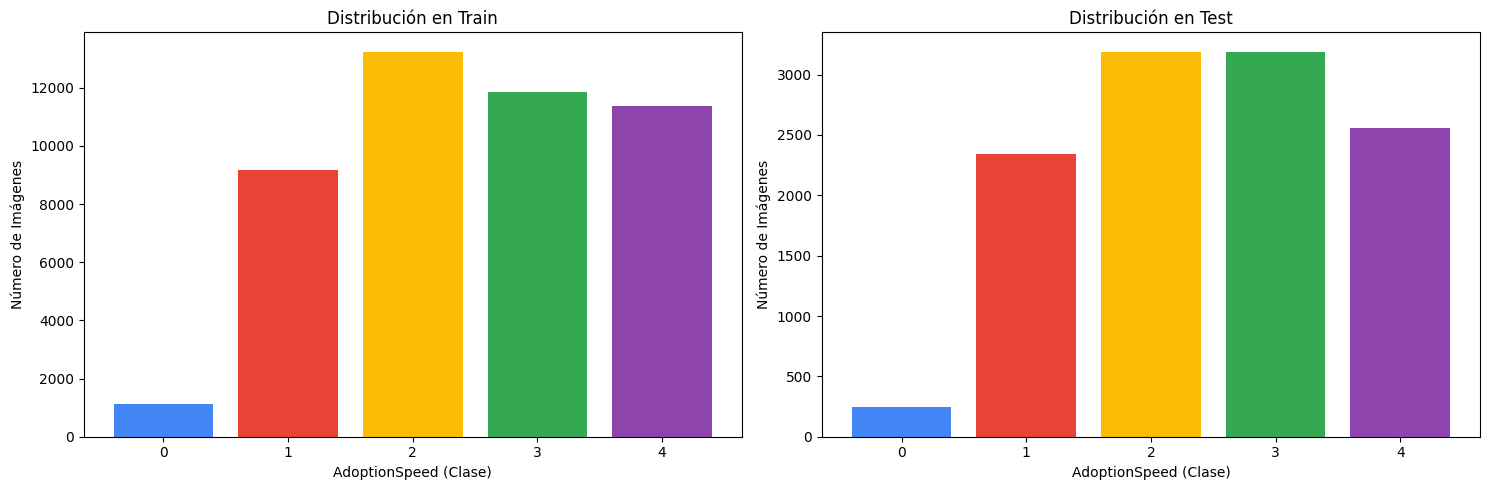

In [11]:
import matplotlib.pyplot as plt
import os

def graficar_distribucion(nombre_carpeta='datos tratados'):
    # 1. Detectar la ruta correcta de la carpeta
    # Probamos en el directorio actual y en el nivel superior
    if os.path.exists(nombre_carpeta):
        base_path = nombre_carpeta
    elif os.path.exists(os.path.join('..', nombre_carpeta)):
        base_path = os.path.join('..', nombre_carpeta) # Sube un nivel
    else:
        print(f"❌ No se encuentra la carpeta '{nombre_carpeta}'")
        print(f"Directorio actual: {os.getcwd()}")
        return

    print(f"✅ Analizando datos en: {os.path.abspath(base_path)}")

    sets = ['Train', 'Test']
    clases = ['0', '1', '2', '3', '4']
    
    fig, ax = plt.subplots(1, 2, figsize=(15, 5))
    
    for i, s in enumerate(sets):
        counts = []
        for c in clases:
            # Construimos la ruta: datos tratados / [Train|Test] / [0-4]
            path = os.path.join(base_path, s, c)
            if os.path.exists(path):
                counts.append(len(os.listdir(path)))
            else:
                counts.append(0)
        
        # Colores corporativos para cada clase de velocidad de adopción
        colores = ['#4285F4', '#EA4335', '#FBBC05', '#34A853', '#8E44AD']
        ax[i].bar(clases, counts, color=colores)
        ax[i].set_title(f'Distribución en {s}')
        ax[i].set_xlabel('AdoptionSpeed (Clase)')
        ax[i].set_ylabel('Número de Imágenes')
        
        # # Añadir el número total encima de cada barra para mayor claridad
        # for j, v in enumerate(counts):
        #     ax[i].text(j, v + 5, str(v), ha='center', fontweight='bold')
    plt.tight_layout()
    plt.show()

# Ejecutar la visualización
graficar_distribucion()

🔍 Analizando imágenes en: c:\Users\Equipo\Desktop\Machine_DL\petfinder-adoption-prediction\train_images


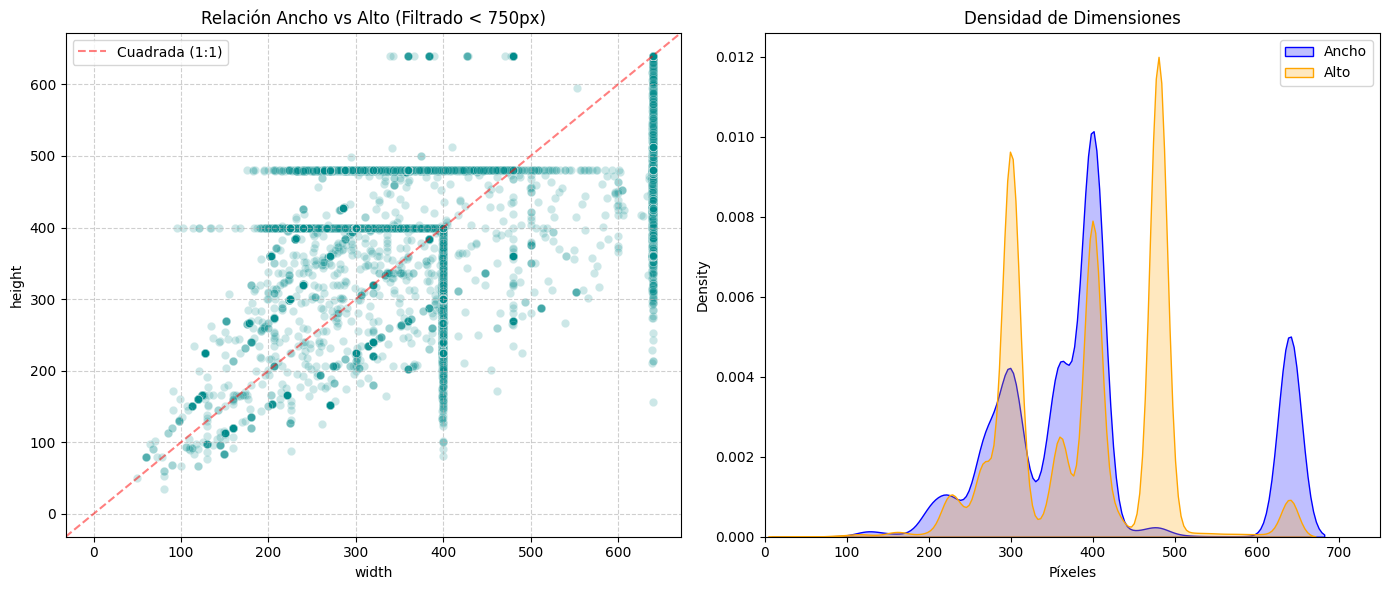


📊 Resumen de Resoluciones (Sin Outliers):
              width        height
count  58310.000000  58310.000000
mean     399.595558    389.494907
std      125.666484     93.489337
min       50.000000     35.000000
25%      300.000000    300.000000
50%      400.000000    400.000000
75%      400.000000    480.000000
max      640.000000    640.000000

📏 Relación de aspecto media: 1.07


In [14]:
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# --- CONFIGURACIÓN DE RUTAS ---
# Definimos el nombre de la carpeta de imágenes
folder_name = os.path.join('petfinder-adoption-prediction', 'train_images')

# Verificamos si la carpeta está "al lado" o "un nivel arriba"
if os.path.exists(folder_name):
    directorio = folder_name
elif os.path.exists(os.path.join('..', folder_name)):
    directorio = os.path.join('..', folder_name)
else:
    print(f"❌ Error: No se encuentra la carpeta en {os.path.abspath(folder_name)}")
    print("Asegúrate de que 'petfinder-adoption-prediction' esté en la raíz de Machine_DL.")
    # Detenemos la ejecución si no hay directorio
    raise FileNotFoundError

print(f"🔍 Analizando imágenes en: {os.path.abspath(directorio)}")

# --- RECOLECCIÓN DE DIMENSIONES ---
resoluciones = []

for archivo in os.listdir(directorio):
    if archivo.endswith('.jpg'):
        path_completo = os.path.join(directorio, archivo)
        try:
            with Image.open(path_completo) as img:
                ancho, alto = img.size
                resoluciones.append({'width': ancho, 'height': alto})
        except:
            continue

df_res = pd.DataFrame(resoluciones)

# --- FILTRO DE OUTLIERS (Límite 750px) ---
df_res = df_res[(df_res['width'] <= 750) & (df_res['height'] <= 750)]

# --- VISUALIZACIÓN GRÁFICA ---
plt.figure(figsize=(14, 6))

# Subplot 1: Distribución Conjunta
plt.subplot(1, 2, 1)
sns.scatterplot(data=df_res, x='width', y='height', alpha=0.2, color='darkcyan')
plt.title('Relación Ancho vs Alto (Filtrado < 750px)')
plt.axline((0, 0), slope=1, color='red', linestyle='--', alpha=0.5, label='Cuadrada (1:1)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()

# Subplot 2: Histogramas de densidad
plt.subplot(1, 2, 2)
sns.kdeplot(df_res['width'], label='Ancho', fill=True, color='blue')
sns.kdeplot(df_res['height'], label='Alto', fill=True, color='orange')
plt.title('Densidad de Dimensiones')
plt.xlabel('Píxeles')
plt.xlim(0, 750)
plt.legend()

plt.tight_layout()
plt.show()

# --- 5. ESTADÍSTICAS ---
print("\n📊 Resumen de Resoluciones (Sin Outliers):")
print(df_res.describe())

df_res['aspect_ratio'] = df_res['width'] / df_res['height']
print(f"\n📏 Relación de aspecto media: {df_res['aspect_ratio'].mean():.2f}")

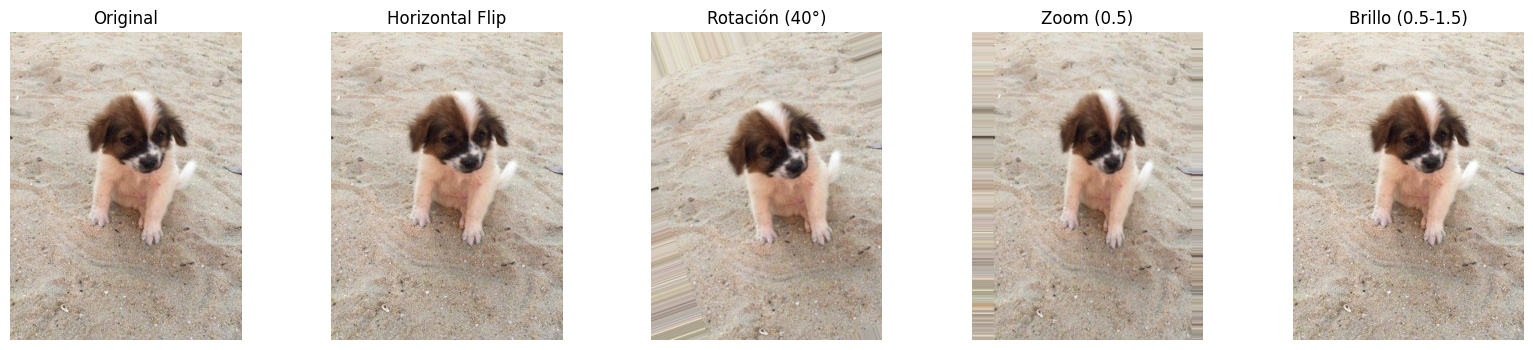

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt
import os

# --- 1. LOCALIZAR LA CARPETA Y LA IMAGEN ---
nombre_carpeta = 'datos tratados'
# Buscamos la carpeta subiendo un nivel si hace falta
if os.path.exists(nombre_carpeta):
    base_tratados = nombre_carpeta
else:
    base_tratados = os.path.join('..', nombre_carpeta)

# Ruta a una clase específica (ej. clase 2)
clase_ejemplo = '2'
sample_path = os.path.join(base_tratados, 'Train', clase_ejemplo)

if not os.path.exists(sample_path):
    print(f"❌ No encuentro la carpeta: {sample_path}")
else:
    # Seleccionar la primera imagen disponible
    archivos = [f for f in os.listdir(sample_path) if f.endswith('.jpg')]
    if not archivos:
        print("❌ No hay imágenes .jpg en esa carpeta.")
    else:
        sample_img_name = archivos[0]
        full_img_path = os.path.join(sample_path, sample_img_name)
        
        # Cargar y preparar la imagen
        img = load_img(full_img_path)
        data = img_to_array(img)
        samples = np.expand_dims(data, 0)

        # --- 2. DEFINIR ESTRATEGIAS DE TRANSFORMACIÓN ---
        # Nota: He bajado un poco el Zoom y la Rotación porque valores de 1 y 60 
        # pueden deformar demasiado al animal para una CNN.
        transformaciones = {
            "Original": ImageDataGenerator(),
            "Horizontal Flip": ImageDataGenerator(horizontal_flip=True),
            "Rotación (40°)": ImageDataGenerator(rotation_range=40),
            "Zoom (0.5)": ImageDataGenerator(zoom_range=0.5),
            "Brillo (0.5-1.5)": ImageDataGenerator(brightness_range=[0.5, 1.5])
        }

        # --- 3. REPRESENTAR GRÁFICAMENTE ---
        plt.figure(figsize=(20, 4))
        for i, (nombre, gen) in enumerate(transformaciones.items()):
            # Generar la transformación
            it = gen.flow(samples, batch_size=1)
            batch = it.next()
            image = batch[0].astype('uint8')
            
            plt.subplot(1, 5, i + 1)
            plt.imshow(image)
            plt.title(nombre)
            plt.axis('off')

        plt.show()